<a href="https://colab.research.google.com/github/MilySierra/Proyecto-Modelos/blob/main/99_modelo_soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar datos**

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.impute import SimpleImputer

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [4]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.45GB/s]


In [5]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [6]:
d = pd.read_csv("train.csv")

# **Preprocesado de datos**

In [8]:
d.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
#Contar estudiantes por carrera
d.E_PRGM_ACADEMICO.value_counts()

,count
E_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


In [ ]:
#Contar estudiantes por carrera en cada departamento
d[["E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO"]].value_counts()

E_PRGM_ACADEMICO                       E_PRGM_DEPARTAMENTO
ADMINISTRACION DE EMPRESAS             BOGOTÁ                 21468
ADMINISTRACIÓN DE EMPRESAS             BOGOTÁ                 19639
DERECHO                                BOGOTÁ                 13051
PSICOLOGIA                             BOGOTÁ                 12668
PSICOLOGÍA                             BOGOTÁ                 12293
                                                              ...  
LICENCIATURA EN PEDAGOGIA REEDUCATIVA  CALDAS                     1
SALUD OCUPACIONAL                      SANTANDER                  1
                                       PUTUMAYO                   1
CIENCIAS DE LA COMPUTACION             BOGOTÁ                     1
ADMINISTRACION DE COMERCIO EXTERIOR    BOLIVAR                    1
Name: count, Length: 2370, dtype: int64

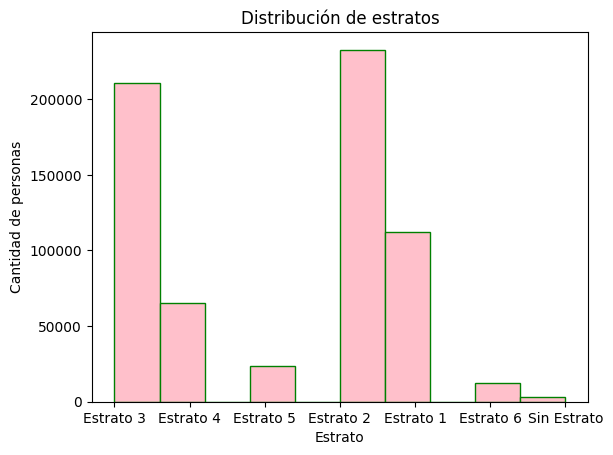

In [ ]:
#Cantidad de personas por estrato socieconómico de manera visual
plt.hist(d["F_ESTRATOVIVIENDA"].dropna(), bins=10, edgecolor="green", color="pink")
plt.title("Distribución de estratos")
plt.ylabel("Cantidad de personas")
plt.xlabel("Estrato")
plt.show()

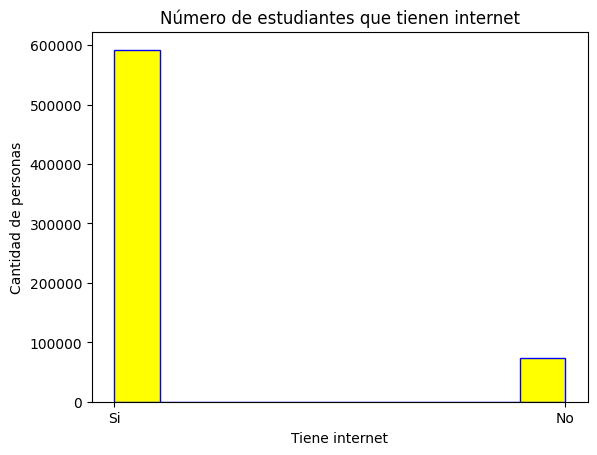

In [ ]:
#Cantidad de personas que tienen internet de manera visual
plt.hist(d["F_TIENEINTERNET"].dropna(), bins=10, edgecolor="blue", color="yellow")
plt.title("Número de estudiantes que tienen internet")
plt.ylabel("Cantidad de personas")
plt.xlabel("Tiene internet")
plt.show()

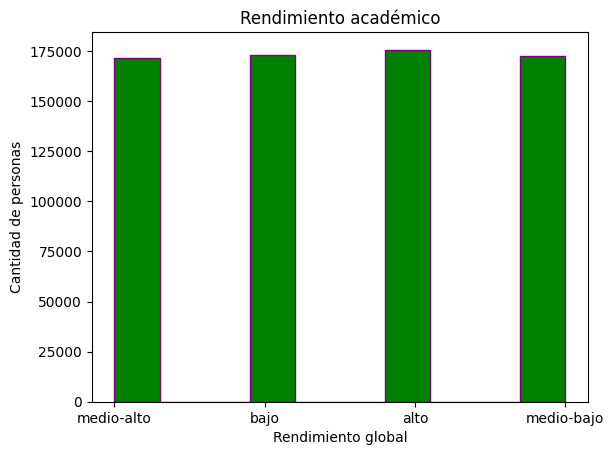

In [7]:
#Cantidad de personas por rendimiento global de manera visual
plt.hist(d["RENDIMIENTO_GLOBAL"].dropna(), bins=10, edgecolor="purple", color="green")
plt.title("Rendimiento académico")
plt.ylabel("Cantidad de personas")
plt.xlabel("Rendimiento global")
plt.show()

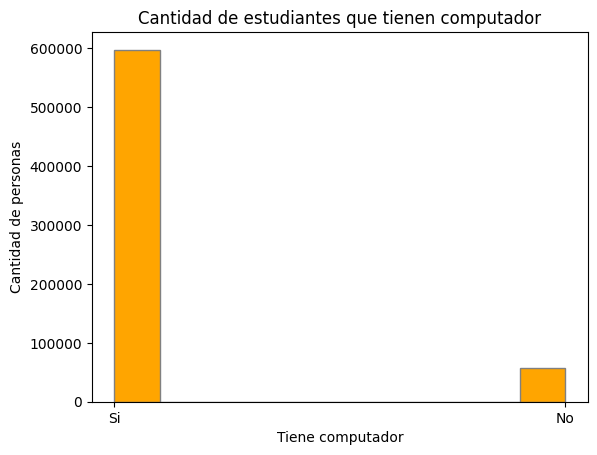

In [ ]:
#Cantidad de estudiantes que cuentan con computador de manera visual
plt.hist(d["F_TIENECOMPUTADOR"].dropna(), bins=10, edgecolor="grey", color="orange")
plt.title("Cantidad de estudiantes que tienen computador")
plt.ylabel("Cantidad de personas")
plt.xlabel("Tiene computador")
plt.show()

# **Limpieza**
En este paso, realizamos una función para realizar la limpieza de los archivos train.csv y test.csv, con el objetivo de organizar los datos y generar una mejor predicción

In [8]:
def clean(data):
  data_clean = data.copy()

  #Inputar datos faltantes a las variables categóricas y numéricas
  imputer_num = SimpleImputer(strategy='mean')
  imputer_cte = SimpleImputer(strategy='most_frequent')

  num = data_clean.select_dtypes(include=['int64', 'float64']).columns
  cte = data_clean.select_dtypes(include=['object']).columns

  data_clean[num] = imputer_num.fit_transform(data_clean[num])
  data_clean[cte] = imputer_cte.fit_transform(data_clean[cte])

  #Eliminamos columnas innecesarias
  columns = ['F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD']
  data_clean = data_clean.drop(columns = [c for c in columns if c in data_clean.columns])

  #Normalización de algunas variables
  for column in ['F_EDUCACIONMADRE', 'F_EDUCACIONPADRE', 'E_VALORMATRICULAUNIVERSIDAD']:
    data_clean[column] = data_clean[column].replace(['No sabe', 'No Aplica'], 'No aplica')

  #Conversión de variable objetivo a tipo numérica
  if 'RENDIMIENTO_GLOBAL' in data_clean.columns:
    academic_performance = {'bajo': 1, 'medio-bajo': 2, 'medio-alto': 3, 'alto': 4}
    data_clean['RENDIMIENTO_GLOBAL'] = data_clean['RENDIMIENTO_GLOBAL'].map(academic_performance)

  #Combinar columnas para mejorar la predicción
  data_clean['EDUCACION_PADRES'] = data_clean['F_EDUCACIONMADRE'] + '_' + data_clean['F_EDUCACIONPADRE']
  data_clean['RECURSOS_ESTUDIO'] = data_clean['F_TIENECOMPUTADOR'] + data_clean['F_TIENEINTERNET']


  #Convertir variable categórica a numérica
  if 'E_HORASSEMANATRABAJA' in data_clean.columns:
      def convertir_horas_trabajo(horas):
          if pd.isna(horas):
              return np.nan

          horas_str = str(horas). strip()

          if horas_str == '0':
              return 0
          elif horas_str == 'Menos de 10 horas':
              return 5
          elif horas_str == 'Entre 11 y 20 horas':
              return 15.5
          elif horas_str == 'Entre 21 y 30 horas':
              return 25.5
          elif horas_str == 'Más de 30 horas':
              return 35
          else:
              return np. nan

      data_clean['E_HORASSEMANATRABAJA_NUM'] = data_clean['E_HORASSEMANATRABAJA'].apply(convertir_horas_trabajo)
      data_clean = data_clean.drop(columns=['E_HORASSEMANATRABAJA'])

  return data_clean

In [9]:
data_clean=clean(d)

#**Entrenamiento del módelo**
En este parte, realizamos el entrenamiento del modelo CatBoost

In [10]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [11]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [13]:
#Eliminamos columnas que no se deben usar para predecir
X = data_clean.drop(columns=["ID", "RENDIMIENTO_GLOBAL"])
#Variable que queremos predecir
y = data_clean["RENDIMIENTO_GLOBAL"]

# Dividimos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#Encontramos las variables catégoricas y las convertimos en índices
categorical_features = X.select_dtypes(include=["object"]).columns
cat_features = [X.columns.get_loc(c) for c in categorical_features]

#Configuración del modelo
clf = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.07,
    depth=6,
    l2_leaf_reg=5,
    cat_features=cat_features,
    random_seed=42,
    verbose=100,
    eval_metric='Accuracy'
)

#Entrenamos el modelo
clf.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

#Predecimos con el conjunto de validación
predict = clf.predict(X_val)
accuracy = accuracy_score(y_val, predict)
print(accuracy)

0:	learn: 0.4012635	test: 0.4034513	best: 0.4034513 (0)	total: 5.69s	remaining: 1h 34m 46s
100:	learn: 0.4399061	test: 0.4405921	best: 0.4406209 (99)	total: 9m 40s	remaining: 1h 26m 4s
200:	learn: 0.4443267	test: 0.4440144	best: 0.4440144 (200)	total: 19m 37s	remaining: 1h 18m
300:	learn: 0.4467816	test: 0.4451047	best: 0.4451769 (299)	total: 29m 28s	remaining: 1h 8m 26s
400:	learn: 0.4480758	test: 0.4455884	best: 0.4457401 (358)	total: 39m 17s	remaining: 58m 41s
500:	learn: 0.4491913	test: 0.4458773	best: 0.4460505 (434)	total: 48m 52s	remaining: 48m 40s
600:	learn: 0.4501480	test: 0.4457617	best: 0.4460722 (515)	total: 58m 43s	remaining: 38m 58s
700:	learn: 0.4514603	test: 0.4456823	best: 0.4460722 (515)	total: 1h 8m 30s	remaining: 29m 13s
800:	learn: 0.4523249	test: 0.4457906	best: 0.4460722 (515)	total: 1h 18m 39s	remaining: 19m 32s
900:	learn: 0.4532942	test: 0.4461155	best: 0.4463249 (888)	total: 1h 28m 31s	remaining: 9m 43s
999:	learn: 0.4542762	test: 0.4460794	best: 0.4463466 (

# **Creación del documento para subir en Kaggle**

In [19]:
data_test = pd.read_csv("test.csv")
data_test_clean = clean(data_test)
ids = data_test_clean["ID"].astype(int)
X_test = data_test_clean.drop(columns=["ID"])
predictions = clf.predict(X_test)
predictions = predictions.ravel()
reverse_map = {
    1: "bajo",
    2: "medio-bajo",
    3: "medio-alto",
    4: "alto"
}
predictions_text = [reverse_map[p] for p in predictions]
submission = pd.DataFrame({"ID": ids,"RENDIMIENTO_GLOBAL": predictions_text})
submission.to_csv("submission.csv", index=False)